In [ ]:
## 1.import the libraries
import pandas as pd
import numpy as np
import math
from math import sqrt
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model 
import matplotlib.pyplot as plt 

In [ ]:
# 2. read the data set file
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# 3.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# 4.
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# 5. check if there is missing value
#df.isnull().sum()
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 645 missing values in data frame


In [ ]:
# 6.we have to handle the missing value 
df=df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# 7.This will select float columns only
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106,70,26,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121,81,28,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127,80,25,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150,95,28,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130,84,23,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179,92,25,66,86,1
4234,1,51,3,1,43,0,0,0,0,207,126,80,19,65,68,0
4237,0,52,2,0,0,0,0,0,0,269,133,83,21,80,107,0
4238,1,40,3,0,0,0,0,1,0,185,141,98,25,67,72,0


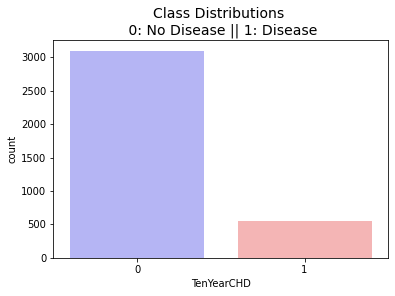

In [ ]:
# view how many 0 and 1 are in the class feature
import seaborn as sns
sns.countplot(x="TenYearCHD", data=df, palette="bwr")
plt.title('Class Distributions \n 0: No Disease || 1: Disease', fontsize=14)
plt.show()

Quantitative Assessment

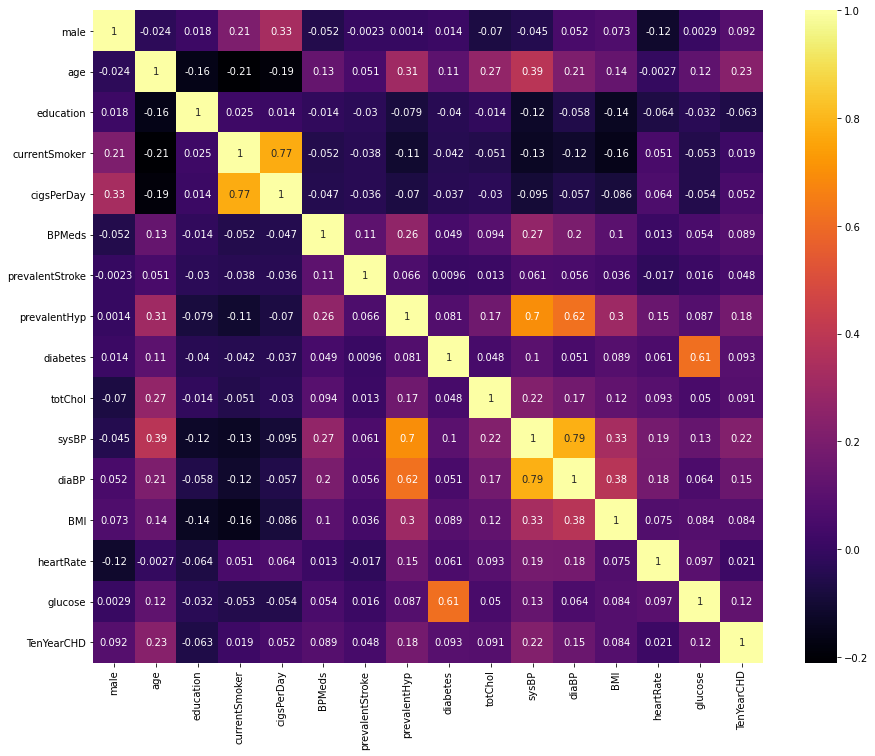

In [ ]:
#7. 1-Correlation Matrix
corr=df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="inferno")

In [ ]:
## 8. What features have the maximum corrolation

def get_redundant_pairs(x):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, x.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(x, n=15):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(x)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print("---------------------------")
print(get_top_abs_correlations(df,10))

Top Absolute Correlations
---------------------------
sysBP          diaBP           0.786824
currentSmoker  cigsPerDay      0.773913
prevalentHyp   sysBP           0.697738
               diaBP           0.618035
diabetes       glucose         0.614820
age            sysBP           0.388495
diaBP          BMI             0.384392
male           cigsPerDay      0.330322
sysBP          BMI             0.330001
age            prevalentHyp    0.306239
dtype: float64


Feature: 0, Score: 40.124
Feature: 1, Score: 42.426
Feature: 2, Score: 68.110
Feature: 3, Score: 90.357
Feature: 4, Score: 71.600
Feature: 5, Score: 8.464
Feature: 6, Score: 94.896
Feature: 7, Score: 27.275
Feature: 8, Score: 31.508
Feature: 9, Score: 22.429
Feature: 10, Score: 46.479
Feature: 11, Score: 36.596
Feature: 12, Score: 7.683
Feature: 13, Score: 62.119
Feature: 14, Score: 20.587


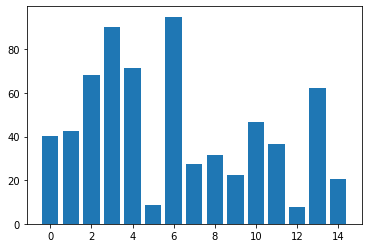

In [ ]:
## 9. Calculate the Significant value of the features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=4240, n_features=15, n_informative=15, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#removing feature 6 (BPMeds), feature 10 (totChol) and feature 13 (BMI) they have low siginficant score
df=df.drop(['BPMeds','totChol','BMI'], axis=1)

In [ ]:
## 10.Normalization: Scale the dataset
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['male', 'age',	'education',	'currentSmoker',	'cigsPerDay',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'heartRate',	'glucose' ,	'TenYearCHD'])
# Separate the target from the data set
X = df_scale.drop(['TenYearCHD'], axis=1)
y = df_scale['TenYearCHD']
X

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.108491,0.234043,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.179245,0.351064,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.207547,0.340426,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,1.0,0.0,0.316038,0.500000,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.221698,0.382979,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1.0,0.473684,0.000000,1.0,0.014286,0.0,1.0,0.0,0.452830,0.468085,0.222222,0.129944
3654,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.202830,0.340426,0.212121,0.079096
3655,0.0,0.526316,0.333333,0.0,0.000000,0.0,0.0,0.0,0.235849,0.372340,0.363636,0.189266
3656,1.0,0.210526,0.666667,0.0,0.000000,0.0,1.0,0.0,0.273585,0.531915,0.232323,0.090395


In [ ]:
## 14.Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print('Training instances Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing instances Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training instances Shape: (2560, 12)
Training Labels Shape: (2560,)
Testing instances Shape: (1098, 12)
Testing Labels Shape: (1098,)


In [ ]:
# 15.Build the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10)
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"DT" : dec,
          "RF" : ran,
          "MLP" :mlp,
          "KNN" : knn,
          "SVM" : svm,
          "NB" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train,y_train)
    scores[key] = model.score(X_test, y_test)

# 16.Measure the Accuracy
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
MLP,0.854281
RF,0.851548
KNN,0.847905
SVM,0.847905
NB,0.830601
DT,0.722222


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

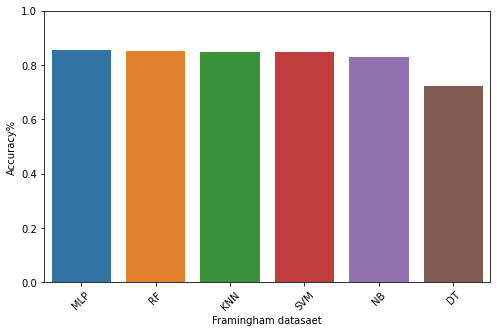

In [15]:
# 17.
plt.figure(figsize=(8,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.ylim(0, 1)
plt.ylabel("Accuracy%")
plt.xlabel("Framingham datasaet")
plt.xticks(rotation=45)

# **Evaluation Metrics**

In [ ]:
# Recall, F1-Score, Precision
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

    #print('\n')
    #print("d_accuracy" + '\t' + str(d_accuracy))
    #print("v_recall" + '\t' + str(v_recall[0]) + '\t' + str(v_recall[1]) + '\t' + str(d_recallAvg))
    #print("v_prec" + '\t' + str(v_prec[0]) + '\t' + str(v_prec[1]) + '\t' + str(d_precAvg))
    
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.8682    0.9270    0.8966       931
         1.0     0.3462    0.2156    0.2657       167

    accuracy                         0.8188      1098
   macro avg     0.6072    0.5713    0.5812      1098
weighted avg     0.7888    0.8188    0.8007      1098



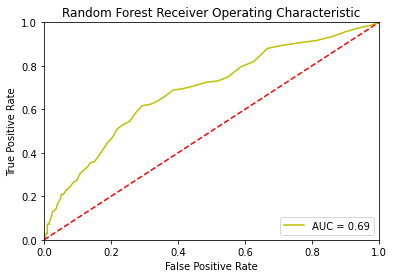

In [ ]:
##### ROC ######################
# 1. Random Forest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

ran = RandomForestClassifier()
ran.fit(X_train, y_train)
probs = ran.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

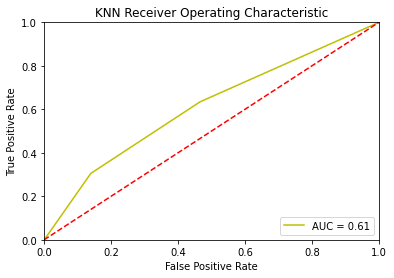

In [ ]:
#2. KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('KNN Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

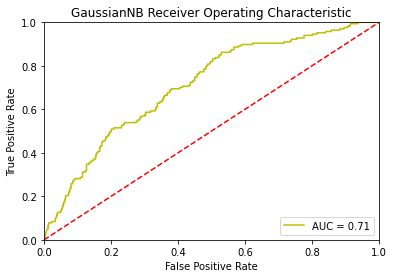

In [ ]:
#3.Gnaive B 
naive = GaussianNB()
naive.fit(X_train, y_train)
probs = naive.predict_proba(X_test)


malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('GaussianNB Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

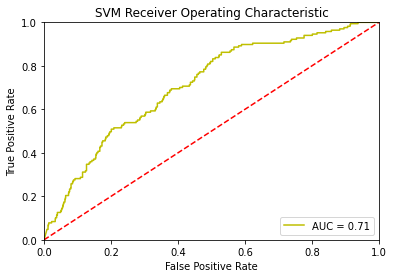

In [ ]:
#4.SVM
svm = SVC()
svm.fit(X_train, y_train)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('SVM Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

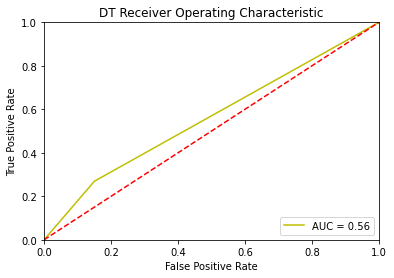

In [ ]:
#5.DT

dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)
probs = dec.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('DT Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()